In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import matplotlib.image as mpimg

# similarly implemented to http://math_research.uct.ac.za/~siphelo/admin/interferometry/5_Imaging/5_1_spatial_frequencies.html

In [3]:
moon = mpimg.imread('Imaging_test_moon.jpg')
astropeiler = mpimg.imread('Imaging_test_astropeiler.jpg')
moon=np.rot90(moon)# rotate so pixel size matches

In [4]:
def go_gray(img):
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    #https://mmuratarat.github.io/2020-05-13/rgb_to_grayscale_formulas
    #gray scale conversion
    gray = 0.299 * r + 0.587 * g + 0.114 * b 
    return gray

astro = go_gray(astropeiler)
moon = go_gray(moon)

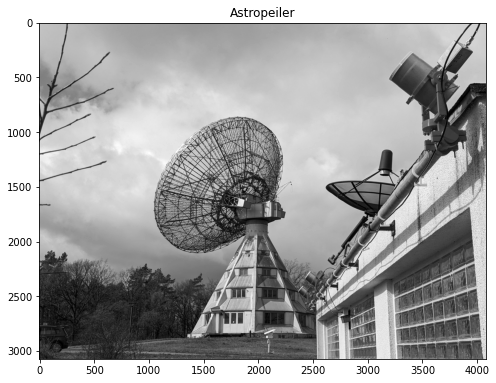

In [5]:
fig = plt.figure(figsize=(8,8))
plt.title('Astropeiler')
astroplot = plt.imshow(astro)
astroplot.set_cmap('gray')
plt.savefig('Astropeiler.png',dpi=200,bbox_inches='tight')

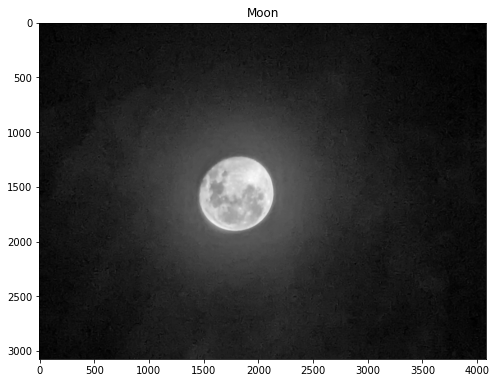

In [6]:
fig = plt.figure(figsize=(8,8))
plt.title('Moon')
moonplot = plt.imshow(moon)
moonplot.set_cmap('gray')
plt.savefig('Moon.png',dpi=200,bbox_inches='tight')

<ipython-input-7-887b968ca0e0>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


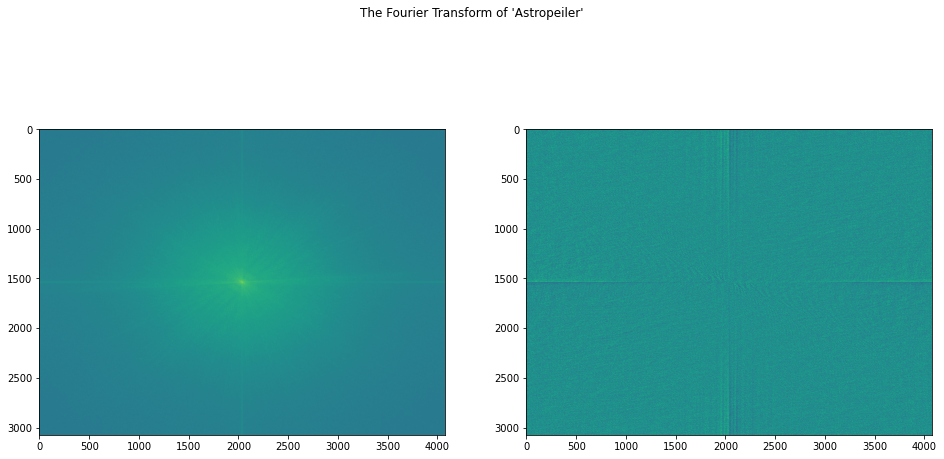

In [7]:
fftastro = np.fft.fftshift(np.fft.fft2(astro))# Fourier transform and shift zero frequency component
fig, axes = plt.subplots(figsize=(16,8))
plt.suptitle('The Fourier Transform of \'Astropeiler\'')
plt.subplot(1,2,1)
plt.imshow( 10. * np.log10(np.abs(fftastro))) #amplitude (logarithmic)
plt.subplot(1,2,2)
plt.imshow(np.angle(fftastro)) #phase  angle -pi, pi
plt.savefig('Astropeiler_FFT.png',dpi=200,bbox_inches='tight')

<ipython-input-8-7310fba5f7ac>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


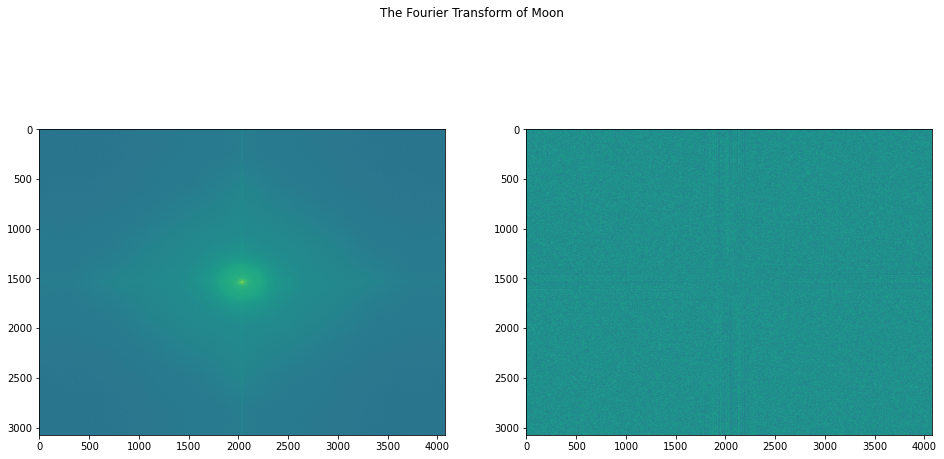

In [8]:
fftmoon = np.fft.fftshift(np.fft.fft2(moon))
fig, axes = plt.subplots(figsize=(16,8))
plt.suptitle('The Fourier Transform of Moon')
plt.subplot(1,2,1)
plt.imshow( 10. * np.log10(np.abs(fftmoon))) 
plt.subplot(1,2,2)
plt.imshow(np.angle(fftmoon))
plt.savefig('Moon_FFT.png',dpi=200,bbox_inches='tight')

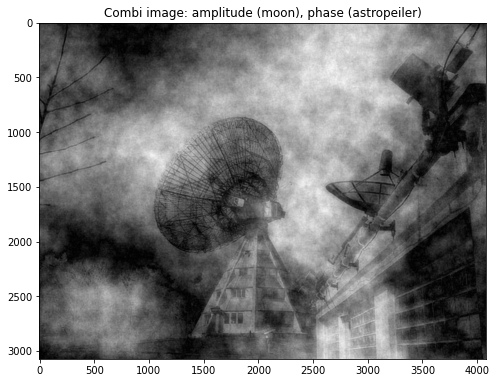

In [9]:
fig = plt.figure(figsize=(8,8))
plt.title('Combi image: amplitude (moon), phase (astropeiler)')
phase = np.angle(fftastro) #phase of astropeiler
amplitude = np.abs(fftmoon) #amplitude of moon
fftCombi = amplitude * (np.cos(phase) + 1j * np.sin(phase)) # Euler complex number 
Combi = np.abs(np.fft.ifft2(np.fft.fftshift(fftCombi))) #inverse FFT to go back to image space
Plot = plt.imshow(Combi)
Plot.set_cmap('gray')
plt.savefig('Combi.png',dpi=200,bbox_inches='tight')

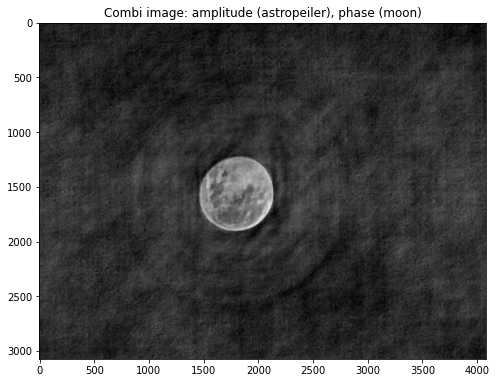

In [10]:
fig = plt.figure(figsize=(8,8))
plt.title('Combi image: amplitude (astropeiler), phase (moon)')
phase = np.angle(fftmoon) #phase of moon
amplitude = np.abs(fftastro) #amplitude of astropeiler
fftCombi = amplitude * (np.cos(phase) + 1j * np.sin(phase)) 
Combi = np.abs(np.fft.ifft2(np.fft.fftshift(fftCombi))) 
Plot = plt.imshow(Combi)
Plot.set_cmap('gray')

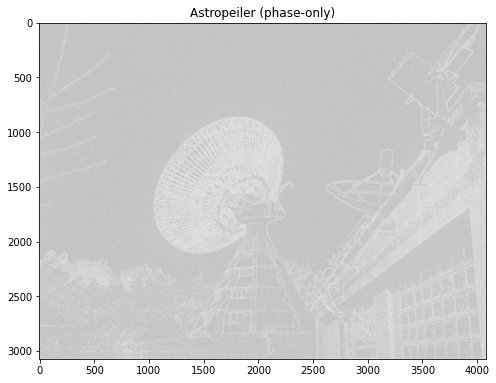

In [11]:
ig = plt.figure(figsize=(8,8))
plt.title('Astropeiler (phase-only)')
phase = np.angle(fftastro)
amplitude = 1.*np.ones_like(fftastro) #set all the amplitude values to 1
fftPhase = amplitude * (np.cos(phase) + 1j * np.sin(phase))
PhasePlot = 10.*np.log10(np.abs(np.fft.ifft2(np.fft.fftshift(fftPhase))))
Plot = plt.imshow(PhasePlot)
Plot.set_cmap('gray')

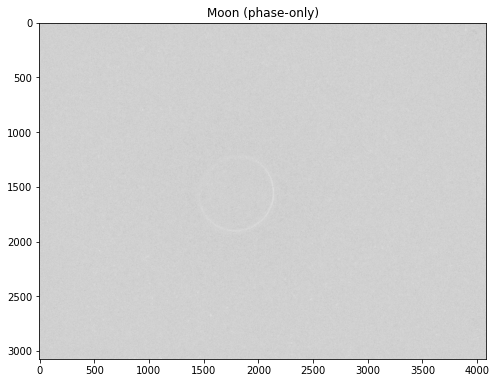

In [12]:
ig = plt.figure(figsize=(8,8))
plt.title('Moon (phase-only)')
phase = np.angle(fftmoon)
amplitude = 1.*np.ones_like(fftmoon) #set all the amplitude values to 1
fftPhase = amplitude * (np.cos(phase) + 1j * np.sin(phase))
PhasePlot = 10.*np.log10(np.abs(np.fft.ifft2(np.fft.fftshift(fftPhase))))
Plot = plt.imshow(PhasePlot)
Plot.set_cmap('gray')

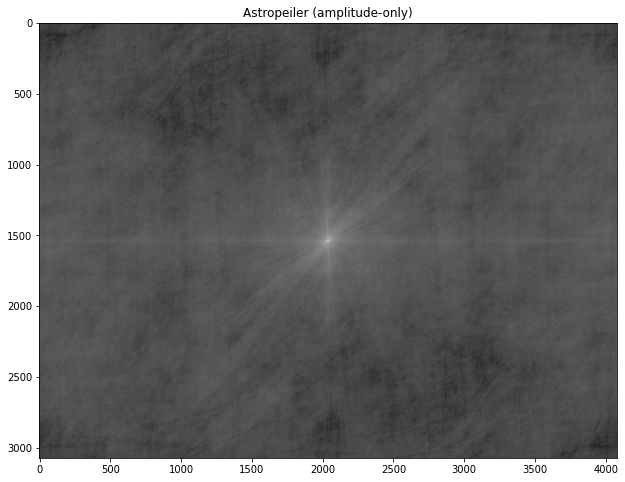

In [13]:
fig, axes = plt.subplots(figsize=(16,8))
plt.title('Astropeiler (amplitude-only)')
phase = np.zeros_like(fftastro) #phase constant zero
amplitude = np.abs(fftastro)
fftAmplitude = amplitude* (np.cos(phase) + 1j * np.sin(phase))
AmplitudePlot = 10.*np.log10(np.abs(np.fft.fftshift(np.fft.ifft2(fftAmplitude))))
Plot = plt.imshow(AmplitudePlot)
Plot.set_cmap('gray')

<ipython-input-14-e56a4eb37af7>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


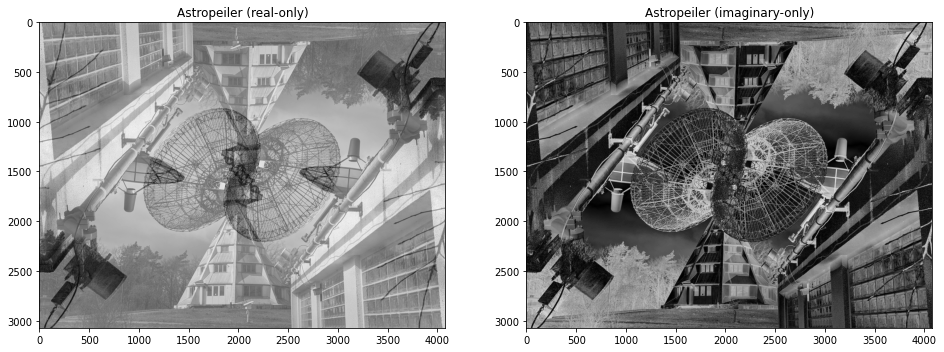

In [14]:
fig, axes = plt.subplots(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Astropeiler (real-only)')
fftReal = np.real(fftastro)
real = np.abs(np.fft.ifft2(fftReal))
plt.imshow(real)
plt.set_cmap('gray')

plt.subplot(1,2,2)
plt.title('Astropeiler (imaginary-only)')
fftImag = 1j * np.imag(fftastro)# multiply by 1j to make it real valued
imag = np.abs(np.fft.ifft2(fftImag))
plt.imshow(imag)
plt.set_cmap('gray')

plt.savefig('Real_and_Imag.png',dpi=200,bbox_inches='tight')